# Principal component analysis

By transforming the data we try to visualise, comprimise and represent the data in a way that makes it possible to extract information.

In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython import display

Firstly, the Algo searches for the direction with the biggest variance (Component 1). Thats the direction in which the data shows the most information (the correlation is the biggest in this direction). Then the Algo searches the direction with the most information orthogonal to the first Component. In the example below we reduce to only the first component and therefore we have only this information. We cancelled out the noise.

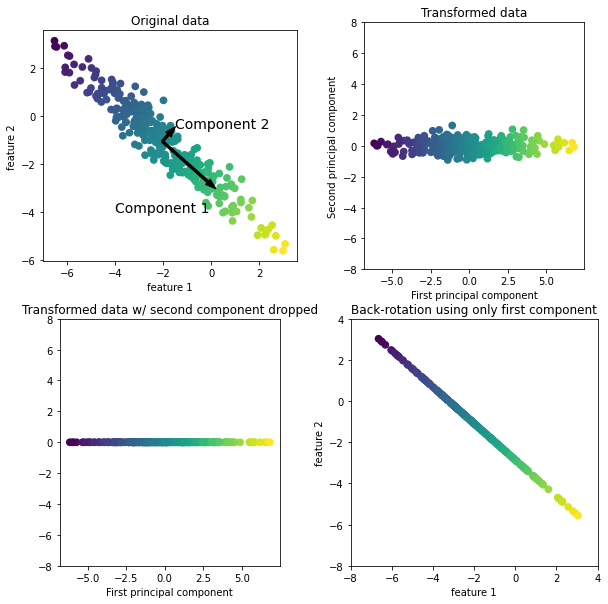

In [3]:
mglearn.plots.plot_pca_illustration()

If we have more than 2 features we can visualise them by multiple histograms.

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

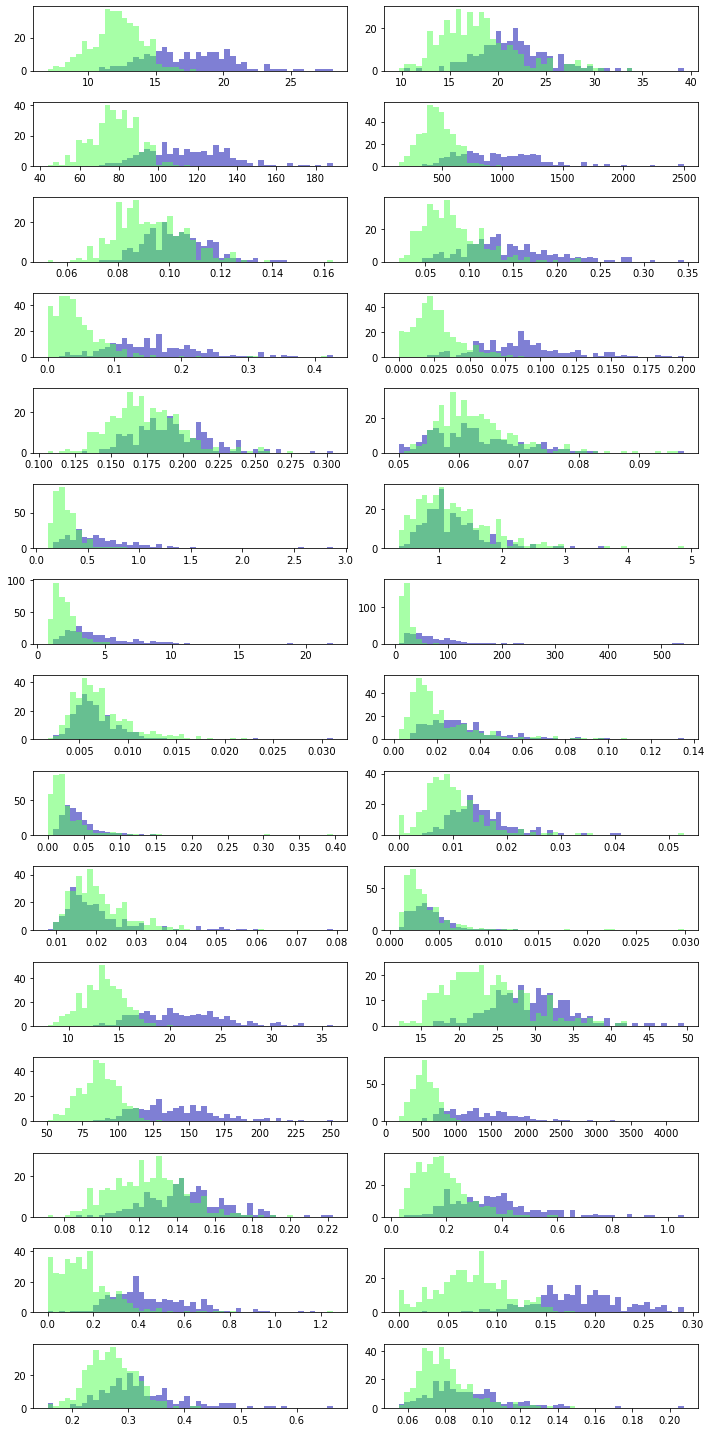

In [6]:
fig, axes = plt.subplots(15,2,figsize = (10,20))
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(maligant[:,i], bins = bins, color = mglearn.cm3(0),alpha = .5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2),alpha = .5)
    
fig.tight_layout()    

If both histograms for one feature are nearly identical than we can not really gain information. These Histograms do not tell anything about the relation between variables and categories. However, the principal component analysis can extract the most important relations by computing the first two main components. 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_scaled)

# Transform to first two principal components
X_pca = pca.transform(X_scaled)


In [10]:
X_scaled.shape

(569, 30)

In [11]:
X_pca.shape

(569, 2)

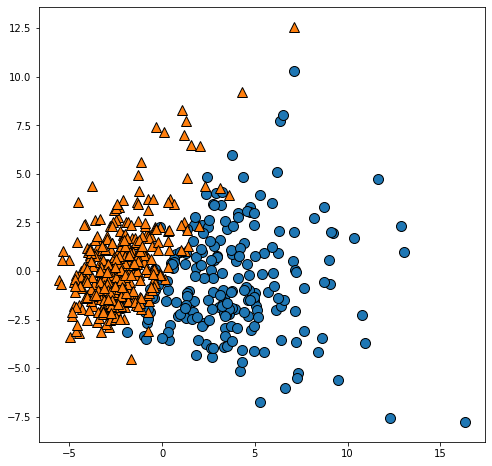

In [12]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

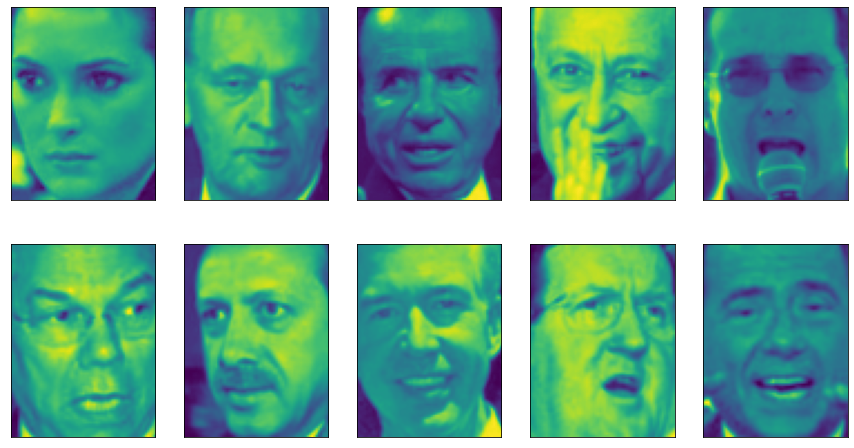

In [13]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2,5,figsize = (15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)

In [17]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask] 
X_people = X_people/255

<ipython-input-17-633dc14082fa>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.23255813953488372

In [28]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca,y_train)

knn.score(X_test_pca,y_test)

0.312015503875969